<h1><center>Kats 203 Time Series Features</center></h1> 

Kats, a tool*K*it to *a*nalyze *t*ime *s*eries data, a light-weight, easy-to-use, and generalizable framework to perform Time Series analysis, including feature extraction, detection, forecasting modeling, and more.

In this tutorial, we will introduce how to apply TsFeatures component for extracting meaningful features from time series

In [1]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kats.consts import TimeSeriesData
from statsmodels.tsa.seasonal import STL
from kats.utils.simulator import Simulator
from sklearn.preprocessing import StandardScaler
from kats.tsfeatures.tsfeatures import TsFeatures

## 1. Getting Data
To demonstrate using TsFeatures for time series feature engineering, we will start with simulating time series data using simulator function in Kats.

In [2]:
sim = Simulator(n=90, freq="D", start = pd.to_datetime("2021-01-01 00:00:00")) # simulate 90 days of data
np.random.seed(100) # setting numpy seed
ts = sim.arima_sim(ar=[0.1, 0.05], ma = [0.04, 0.1], d = 1) # generating time series data with arima_sim
ts.to_dataframe().head() # let's take a glimpse on the simulated data

,time,value
0,2021-01-01,0.797342
1,2021-01-02,1.494317
2,2021-01-03,1.608064
3,2021-01-04,1.186103
4,2021-01-05,2.147635


Let's visualize this time series data.

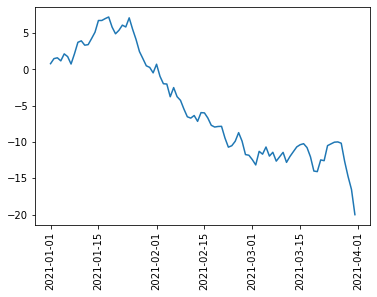

In [3]:
ts_dataframe = ts.to_dataframe() # transforming the TimeSeriesData object to pd.DataFrame
plt.plot(
    pd.to_datetime(ts_dataframe.time.values),
    ts_dataframe.value.values
)
plt.xticks(rotation = 90);

Currently, TsFeatures can only process one time series a time, you can loop through all your time series data in a list to acquire the engineered features. Let's simulate a list of time series data to demonstrate the process.

In [4]:
ts_list = [sim.arima_sim(ar=[0.1, 0.05], ma = [0.04, 0.1], d = 1) for _ in range(10)]

# let's take a look at one of the time series simulated in the list
ts_list[0].to_dataframe().head()

,time,value
0,2021-01-01,1.315192
1,2021-01-02,1.999997
2,2021-01-03,0.362509
3,2021-01-04,0.089215
4,2021-01-05,-1.761805


Let's simulate more time series data in the ts_list for different applications in the following sections.

In [5]:
# simulate time series data with trend shifts
ts_list.extend([
    sim.trend_shift_sim(
        cp_arr = [30, 60, 75],
        trend_arr=[3, 15, 2, 8],
        intercept=30,
        noise=50,
        seasonal_period=7,
        seasonal_magnitude=np.random.uniform(10, 100)
    ) for _ in range(10)
])

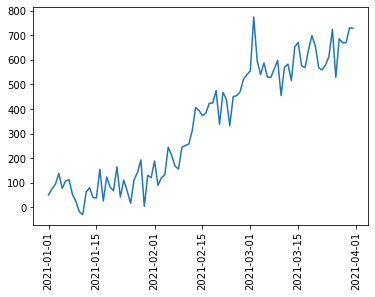

In [6]:
# visualize the last time series sample with trend shifts
ts_dataframe = ts_list[-1].to_dataframe() # transforming the TimeSeriesData object to pd.DataFrame
plt.plot(
    pd.to_datetime(ts_dataframe.time.values),
    ts_dataframe.value.values
)
plt.xticks(rotation = 90);

In [7]:
# simulate time series data with level shifts
ts_list.extend([
    sim.level_shift_sim(
        cp_arr = [30, 60, 75],
        level_arr=[1.35, 1.05, 1.35, 1.2],
        noise=0.05,
        seasonal_period=7,
        seasonal_magnitude=np.random.uniform(0.1, 1.0)
    ) for _ in range(10)
])

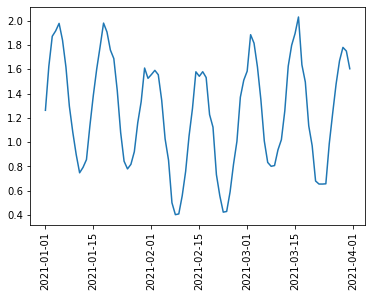

In [8]:
# visualize the last time series sample with level shifts
ts_dataframe = ts_list[-1].to_dataframe() # transforming the TimeSeriesData object to pd.DataFrame
plt.plot(
    pd.to_datetime(ts_dataframe.time.values),
    ts_dataframe.value.values
)
plt.xticks(rotation = 90);

## 2. Basic Usage
In this section, let's talk about how to perform feature engineering on time series data using TsFeatures.

In [9]:
# Step 1. initiate TsFeatures
model = TsFeatures()

# Step 2. use .transform() method, and apply on the target time series data
output_features = model.transform(ts)
output_features

../kats/tsfeatures/tsfeatures.py:390: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

../kats/tsfeatures/tsfeatures.py:401: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




{'length': 90,
 'mean': -4.973228083549793,
 'var': 50.69499812650379,
 'entropy': -0.2742447620827895,
 'lumpiness': 10.258210327109449,
 'stability': 45.07760417461487,
 'flat_spots': 1,
 'hurst': 0.4188436896564726,
 'std1st_der': 0.8773588739369633,
 'crossing_points': 5,
 'binarize_mean': 0.43333333333333335,
 'unitroot_kpss': 0.41641147078333335,
 'heterogeneity': 73.29527168434541,
 'histogram_mode': -11.841676172131818,
 'linearity': 0.8346355269096618,
 'trend_strength': 0.9853025999592567,
 'seasonality_strength': 0.3521955818150291,
 'spikiness': 0.00020455870537077636,
 'peak': 1,
 'trough': 6,
 'level_shift_idx': 23,
 'level_shift_size': 0.7134342301151566,
 'y_acf1': 0.9597578784708428,
 'y_acf5': 4.0361834721280365,
 'diff1y_acf1': 0.1830233735938267,
 'diff1y_acf5': 0.0794760417768679,
 'diff2y_acf1': -0.4816907863327952,
 'diff2y_acf5': 0.24476824866108501,
 'y_pacf5': 0.9862593061001352,
 'diff1y_pacf5': 0.07981792144706332,
 'diff2y_pacf5': 0.36145785941160113,
 'sea

We currently calculate 40 features by default, and we also support 28 additional features. Users can choose which features to opt-in or opt-out in the calculation using *selected_features* argument, which will be demonstrated in section 4.

Let's now loop through the time series data list, and create a dataframe of features.

In [10]:
model = TsFeatures()
output_features = [model.transform(ts) for ts in ts_list] # loop through time series data and perform transformation

../kats/tsfeatures/tsfeatures.py:390: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

../kats/tsfeatures/tsfeatures.py:401: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outsi

In [11]:
df_features = pd.DataFrame(output_features) # converting to dataframe
df_features.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,diff2y_pacf5,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma
0,90,-2.058767,10.041589,-0.366121,23.888037,5.711696,1,0.449241,0.701685,8,...,0.749517,0.327535,-0.226641,21,11,0.866466,NaN,NaN,NaN,NaN
1,90,9.908474,54.513387,-0.371858,44.741126,45.977900,1,0.249448,0.983165,3,...,0.324193,0.668572,0.124300,55,31,1.000000,NaN,NaN,NaN,NaN
2,90,-4.852956,21.728208,-0.492625,9.067492,16.945737,1,0.377345,0.705047,11,...,0.533415,0.524764,0.009480,31,27,1.000000,NaN,NaN,NaN,NaN
3,90,-1.521848,28.601801,-0.402300,259.161089,17.962647,1,0.543165,0.880529,6,...,0.460363,0.398363,-0.106916,25,16,1.000000,NaN,NaN,NaN,NaN
4,90,-6.170002,12.672862,-0.514758,1.400625,9.823430,1,0.000917,0.865091,9,...,0.378576,0.555606,0.093118,11,30,1.000000,NaN,NaN,NaN,NaN


## 3. Applications
In this section, we'll use three examples to demonstrate some applications of TsFeatures in identifying internal attributes of time series data. We will use the *df_features* dataframe output from the section 2 in these applications.

### 3.1 Finding time series data with the highest seasonal component
We will demonstrate leveraging TsFeatures for finding the time series data with the highest seasonality strength among the simulated time series data.

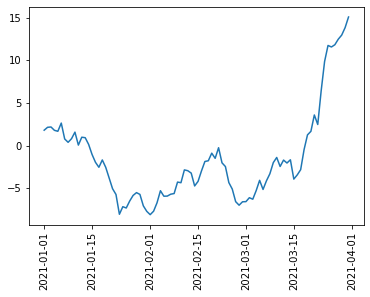

In [12]:
feature_name = 'seasonality_strength'
df = df_features.dropna(subset=[feature_name]).sort_values(by=feature_name)
target_ts = ts_list[int(df.reset_index()['index'].iloc[-1])].to_dataframe() # finding the time series sample with the highest seasonality strength

plt.plot(
    pd.to_datetime(target_ts.time.values),
    target_ts.value.values
)
plt.xticks(rotation = 90);

Now, let's decompose the above time series data using STL decomposition, and visualize its seasonal component.

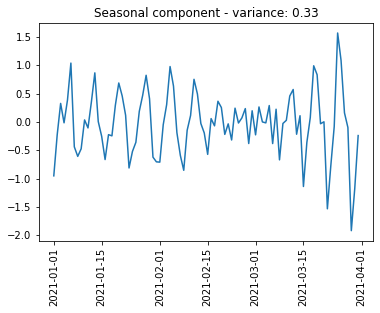

In [13]:
stl = STL(target_ts.value.values, period=7)
res = stl.fit()
plt.plot(
    pd.to_datetime(target_ts.time.values),
    res.seasonal
)
plt.xticks(rotation = 90);
plt.title(f'Seasonal component - variance: {np.round(np.var(res.seasonal), 2)}');

Let's compare the above figure with the seasonal component of the time series data with the 2nd largest seasonal strength identified by TsFeatures.

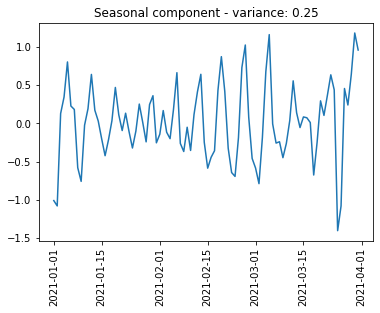

In [14]:
target_ts = ts_list[int(df.reset_index()['index'].iloc[-2])].to_dataframe() # finding the time series sample with the highest seasonality strength
stl = STL(target_ts.value.values, period=7)
res = stl.fit()
plt.plot(
    pd.to_datetime(target_ts.time.values),
    res.seasonal
)
plt.xticks(rotation = 90);
plt.title(f'Seasonal component - variance: {np.round(np.var(res.seasonal), 2)}');

From the above comparison, we can see the 2nd time series data has a smaller variation on its seasonal components, and thus less strength in its seasonality.

### 3.2 find highly "unpredictible" time series (i.e., time series sample with the lowest entropy)
Let's use TsFeatures to identify time series sample that is the hardest to forecast within our simulated time series data, i.e. the time series sample with the lowest entropy.

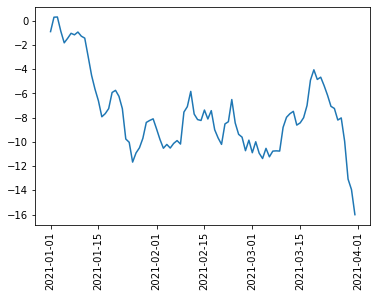

In [15]:
feature_name = 'entropy'
df = df_features.dropna(subset=[feature_name]).sort_values(by=feature_name)

target_ts = ts_list[int(df.reset_index()['index'].iloc[0])].to_dataframe() # finding the time series sample with the loweest entropy

plt.plot(
    pd.to_datetime(target_ts.time.values),
    target_ts.value.values
)
plt.xticks(rotation = 90);

Let's compare the above figure with the time series data with the 2nd smallest entropy identified by TsFeatures.

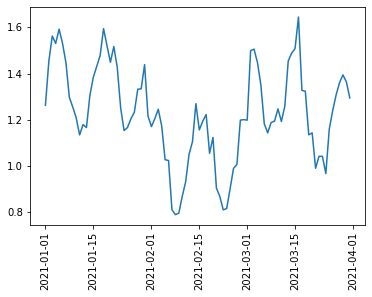

In [16]:
target_ts = ts_list[int(df.reset_index()['index'].iloc[1])].to_dataframe() # finding the time series sample with the loweest entropy

plt.plot(
    pd.to_datetime(target_ts.time.values),
    target_ts.value.values
)
plt.xticks(rotation = 90);

As we can see from the figures above, the 2nd plot shows more apparent seasonality, as well as change-points, thus, theoretically easier to be forecasted.

### 3.3 Find clusters of similar time series
Let's perform a dimension reduction on the simulated time series data, and visualize to see if there's clear pattern of clusters.

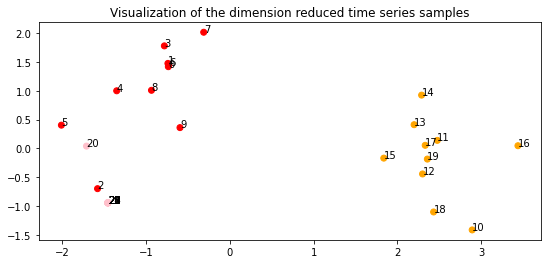

In [17]:
# performing dimension reduction on the time series samples
ls_features = ['lumpiness', 'entropy', 'seasonality_strength', 'stability', 'level_shift_size']
df_dataset = df_features.reset_index()[['index'] + ls_features].dropna()
scaler = StandardScaler()
x_2d = PCA(n_components=2).fit_transform(X=scaler.fit_transform(df_dataset[ls_features].values))

# let's distinguish points by simulation batches
colors = ['red' for _ in range(10)] # simulated using arima_sim
colors.extend(['orange' for _ in range(10)]) # simulated with trend shifts
colors.extend(['pink' for _ in range(10)]) # simulated with level shifts

plt.figure(figsize = (9,4))
plt.scatter(x=x_2d[:,0], y=x_2d[:,1], c = colors)
for i in range(len(x_2d[:,0])):
    plt.text(x=x_2d[i,0], y=x_2d[i,1], s = df_dataset.index[i])
plt.title('Visualization of the dimension reduced time series samples');

It can be seen that most of the same-batch-simulated time series samples are closer to each other, i.e., features extracted using TsFeatures express internal attributes of time series samples, which can be used to identify commonalities and perform operations like clustering.

## 4. Out-in/out features for calculation
In TsFeatures, you can choose which features/groups you'd like to calculate, and also which features/groups not to calculate. Let's take a look at several feasible use cases.


### 4.1 Opting-out features

Let's start with opting-out the calculation of a feature group, for example, we don't want STL related features.

In [18]:
tsf = TsFeatures(stl_features = False)
tsf.transform(ts)

../kats/tsfeatures/tsfeatures.py:390: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

../kats/tsfeatures/tsfeatures.py:401: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




{'length': 90,
 'mean': -4.973228083549793,
 'var': 50.69499812650379,
 'entropy': -0.2742447620827895,
 'lumpiness': 10.258210327109449,
 'stability': 45.07760417461487,
 'flat_spots': 1,
 'hurst': 0.4188436896564726,
 'std1st_der': 0.8773588739369633,
 'crossing_points': 5,
 'binarize_mean': 0.43333333333333335,
 'unitroot_kpss': 0.41641147078333335,
 'heterogeneity': 73.29527168434541,
 'histogram_mode': -11.841676172131818,
 'linearity': 0.8346355269096618,
 'level_shift_idx': 23,
 'level_shift_size': 0.7134342301151566,
 'y_acf1': 0.9597578784708428,
 'y_acf5': 4.0361834721280365,
 'diff1y_acf1': 0.1830233735938267,
 'diff1y_acf5': 0.0794760417768679,
 'diff2y_acf1': -0.4816907863327952,
 'diff2y_acf5': 0.24476824866108501,
 'y_pacf5': 0.9862593061001352,
 'diff1y_pacf5': 0.07981792144706332,
 'diff2y_pacf5': 0.36145785941160113,
 'seas_acf1': 0.8149983814152568,
 'seas_pacf1': 0.030344962550473743,
 'firstmin_ac': 53,
 'firstzero_ac': 30,
 'holt_alpha': 0.9999999850988388,
 'holt

We don't see features under the stl_features group being output from the calculation, since we've disabled the calculation for entire feature group. In TsFeatures, we have 14 feature groups, and you can opt-in/out any one of the groups in the calculation. Below is the group to feature mapping:

In [19]:
group2feature = {
    "stl_features": [
        "trend_strength",
        "seasonality_strength",
        "spikiness",
        "peak",
        "trough",
    ],
    "level_shift_features": [
        "level_shift_idx",
        "level_shift_size",
    ],
    "acfpacf_features": [
        "y_acf1",
        "y_acf5",
        "diff1y_acf1",
        "diff1y_acf5",
        "diff2y_acf1",
        "diff2y_acf5",
        "y_pacf5",
        "diff1y_pacf5",
        "diff2y_pacf5",
        "seas_acf1",
        "seas_pacf1",
    ],
    "special_ac": [
        "firstmin_ac",
        "firstzero_ac",
    ],
    "holt_params": [
        "holt_alpha",
        "holt_beta",
    ],
    "hw_params": [
        "hw_alpha",
        "hw_beta",
        "hw_gamma",
    ],
    "statistics": [
        "length",
        "mean",
        "var",
        "entropy",
        "lumpiness",
        "stability",
        "flat_spots",
        "hurst",
        "std1st_der",
        "crossing_points",
        "binarize_mean",
        "unitroot_kpss",
        "heterogeneity",
        "histogram_mode",
        "linearity",
    ],
    "cusum_detector": [
        "cusum_num",
        "cusum_conf",
        "cusum_cp_index",
        "cusum_delta",
        "cusum_llr",
        "cusum_regression_detected",
        "cusum_stable_changepoint",
        "cusum_p_value",
    ],
    "robust_stat_detector": [
        "robust_num",
        "robust_metric_mean",
    ],
    "bocp_detector": [
        "bocp_num",
        "bocp_conf_max",
        "bocp_conf_mean",
    ],
    "outlier_detector": [
        "outlier_num",
    ],
    "trend_detector": [
        "trend_num",
        "trend_num_increasing",
        "trend_avg_abs_tau",
    ],
    "nowcasting": [
        "nowcast_roc",
        "nowcast_ma",
        "nowcast_mom",
        "nowcast_lag",
        "nowcast_macd",
        "nowcast_macdsign",
        "nowcast_macddiff",
    ],
    "seasonalities": [
        "seasonal_period",
        "trend_mag",
        "seasonality_mag",
        "residual_std",
    ],
}

Meanwhile, we can also opt-out each of the 68 features using the following method

In [20]:
tsf = TsFeatures(length = False, mean = False, var = False, entropy = False, nowcast_ma = False, trend_mag = False)
tsf.transform(ts)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




{'lumpiness': 10.258210327109449,
 'stability': 45.07760417461487,
 'flat_spots': 1,
 'hurst': 0.4188436896564726,
 'std1st_der': 0.8773588739369633,
 'crossing_points': 5,
 'binarize_mean': 0.43333333333333335,
 'unitroot_kpss': 0.41641147078333335,
 'heterogeneity': 73.29527168434541,
 'histogram_mode': -11.841676172131818,
 'linearity': 0.8346355269096618,
 'trend_strength': 0.9853025999592567,
 'seasonality_strength': 0.3521955818150291,
 'spikiness': 0.00020455870537077636,
 'peak': 1,
 'trough': 6,
 'level_shift_idx': 23,
 'level_shift_size': 0.7134342301151566,
 'y_acf1': 0.9597578784708428,
 'y_acf5': 4.0361834721280365,
 'diff1y_acf1': 0.1830233735938267,
 'diff1y_acf5': 0.0794760417768679,
 'diff2y_acf1': -0.4816907863327952,
 'diff2y_acf5': 0.24476824866108501,
 'y_pacf5': 0.9862593061001352,
 'diff1y_pacf5': 0.07981792144706332,
 'diff2y_pacf5': 0.36145785941160113,
 'seas_acf1': 0.8149983814152568,
 'seas_pacf1': 0.030344962550473743,
 'firstmin_ac': 53,
 'firstzero_ac': 3

### 4.2 Opting-in features

Let's start with opt-in the calculation of a few of the features.

In [21]:
tsf = TsFeatures(selected_features = [
    'mean',
    'var',
    'entropy',
    'lumpiness',
    'hurst',
    'trend_strength',
    'y_acf1',
    'firstmin_ac',
    'holt_alpha',
    'nowcast_roc',
    'bocp_num',
    'seasonality_mag',
])
tsf.transform(ts)

{'mean': -4.973228083549793,
 'var': 50.69499812650379,
 'entropy': -0.2742447620827895,
 'lumpiness': 10.258210327109449,
 'hurst': 0.4188436896564726,
 'trend_strength': 0.9853025999592567,
 'y_acf1': 0.9597578784708428,
 'firstmin_ac': 53,
 'holt_alpha': 0.9999999850988388,
 'bocp_num': 2,
 'nowcast_roc': 0.05212172487338157,
 'seasonality_mag': 1.0}

Since we bundle features into feature groups, we can also opt-in the calculation of only some of the feature groups.

In [22]:
tsf = TsFeatures(selected_features = [
    'statistics',
    'acfpacf_features',
    'holt_alpha',
    'nowcasting',
])
tsf.transform(ts)

../kats/tsfeatures/tsfeatures.py:390: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




{'length': 90,
 'mean': -4.973228083549793,
 'var': 50.69499812650379,
 'entropy': -0.2742447620827895,
 'lumpiness': 10.258210327109449,
 'stability': 45.07760417461487,
 'flat_spots': 1,
 'hurst': 0.4188436896564726,
 'std1st_der': 0.8773588739369633,
 'crossing_points': 5,
 'binarize_mean': 0.43333333333333335,
 'unitroot_kpss': 0.41641147078333335,
 'heterogeneity': 73.29527168434541,
 'histogram_mode': -11.841676172131818,
 'linearity': 0.8346355269096618,
 'y_acf1': 0.9597578784708428,
 'y_acf5': 4.0361834721280365,
 'diff1y_acf1': 0.1830233735938267,
 'diff1y_acf5': 0.0794760417768679,
 'diff2y_acf1': -0.4816907863327952,
 'diff2y_acf5': 0.24476824866108501,
 'y_pacf5': 0.9862593061001352,
 'diff1y_pacf5': 0.07981792144706332,
 'diff2y_pacf5': 0.36145785941160113,
 'seas_acf1': 0.8149983814152568,
 'seas_pacf1': 0.030344962550473743,
 'holt_alpha': 0.9999999850988388,
 'nowcast_roc': 0.05212172487338157,
 'nowcast_ma': -4.832882514728338,
 'nowcast_mom': -0.957542829822739,
 'no

Lastly, we can mix up the opt-in and opt-out to calculate majority of the features among some feature groups, while opting-out some of the features within these feature groups that are opt-in.

In [23]:
tsf = TsFeatures(selected_features = [
    'statistics',
    'acfpacf_features',
    'holt_alpha',
    'nowcasting',
], mean = False, y_pacf5 = False, diff2y_pacf5 = False, nowcast_macdsign = False, nowcast_macddiff = False)
tsf.transform(ts)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




{'length': 90,
 'var': 50.69499812650379,
 'entropy': -0.2742447620827895,
 'lumpiness': 10.258210327109449,
 'stability': 45.07760417461487,
 'flat_spots': 1,
 'hurst': 0.4188436896564726,
 'std1st_der': 0.8773588739369633,
 'crossing_points': 5,
 'binarize_mean': 0.43333333333333335,
 'unitroot_kpss': 0.41641147078333335,
 'heterogeneity': 73.29527168434541,
 'histogram_mode': -11.841676172131818,
 'linearity': 0.8346355269096618,
 'y_acf1': 0.9597578784708428,
 'y_acf5': 4.0361834721280365,
 'diff1y_acf1': 0.1830233735938267,
 'diff1y_acf5': 0.0794760417768679,
 'diff2y_acf1': -0.4816907863327952,
 'diff2y_acf5': 0.24476824866108501,
 'diff1y_pacf5': 0.07981792144706332,
 'seas_acf1': 0.8149983814152568,
 'seas_pacf1': 0.030344962550473743,
 'holt_alpha': 0.9999999850988388,
 'nowcast_roc': 0.05212172487338157,
 'nowcast_ma': -4.832882514728338,
 'nowcast_mom': -0.957542829822739,
 'nowcast_lag': -4.393327628568679,
 'nowcast_macd': -0.9380868822690596}

### 4.3 Unsupported types of opt-in/out

Following are the opt-in/out cases that we don't support.
1. Opt-out the calculation of an entire feature group while still want to opt-in the calculation of some features within the group.

In [24]:
tsf = TsFeatures(selected_features = [
    'mean',
    'var',
    'lumpiness',
    'hurst',
    'trend_strength',
    'y_acf1',
    'firstmin_ac',
    'holt_alpha',
], statistics = False)
tsf.transform(ts)

AssertionError: feature group: statistics has to be opt-in based on your opt-in request of feature: mean

2. Opt-in and Opt-out the same feature at the same time

In [27]:
tsf = TsFeatures(selected_features = [
    'statistics',
    'mean',
], mean = False)
tsf.transform(ts)

AssertionError: you have requested to both opt-in and opt-out feature: mean

3. Opt-in/out features that are not in TsFeatures

In [28]:
tsf = TsFeatures(selected_features = [
    'mean',
    'var',
    '_entropy_',
    'lumpiness',
    'hurst',
    'y_acf1',
])
tsf.transform(ts)

AssertionError: couldn't find your desired feature/group "_entropy_", please check spelling

## Conclusion

In this tutorial, we've demonstrated basic functions of TsFeatures, also with the demonstration of some of the interesting applications. We hope you've enjoyed the tutorial, and looking forward to your exploration of more exciting use cases of TsFeatures. Thanks!